In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput
import decimal

In [2]:
def range_decimal(start, stop, step, stop_inclusive=False):
    """ The Python range() function, using decimals.  A decimal loop_value generator.

    Note: The decimal math (addition) defines the rounding.

    If the stop is None, then:
        stop = start
        start = 0 (zero)

    If the step is 0 (zero) or None, then:
        if (stop < start) then step = -1 (minus one)
        if (stop >= start) then step = 1 (one)

    Example:
        for index in range_decimal(0, 1.0, '.1', stop_inclusive=True):
            print(index)

    :param start: The loop start value
    :param stop: The loop stop value
    :param step: The loop step value
    :param stop_inclusive: Include the stop value in the loop's yield generator: False = excluded ; True = included
    :return: The loop generator's yield increment value (decimal)
    """
    try:
        # Input argument(s) error check
        zero = decimal.Decimal('0')

        if start is None:
            start = zero

        if not isinstance(start, decimal.Decimal):
            start = decimal.Decimal(f'{start}')

        if stop is None:
            stop = start
            start = zero

        if not isinstance(stop, decimal.Decimal):
            stop = decimal.Decimal(f'{stop}')

        if step is None:
            step = decimal.Decimal('-1' if stop < start else '1')

        if not isinstance(step, decimal.Decimal):
            step = decimal.Decimal(f'{step}')

        if step == zero:
            step = decimal.Decimal('-1' if stop < start else '1')

        # Check for valid loop conditions
        if start == stop or (start < stop
                             and step < zero) or (start > stop
                                                  and step > zero):
            return  # Not valid: no loop

        # Case: increment step ( > 0 )
        if step > zero:
            while start < stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Case: decrement step ( < 0 )
        else:
            while start > stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Yield the stop value (inclusive)
        if stop_inclusive:
            yield stop

    except (ValueError, decimal.DecimalException) as ex:
        raise ValueError(f'{__name__}.range_decimal() error: {ex}')

In [3]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

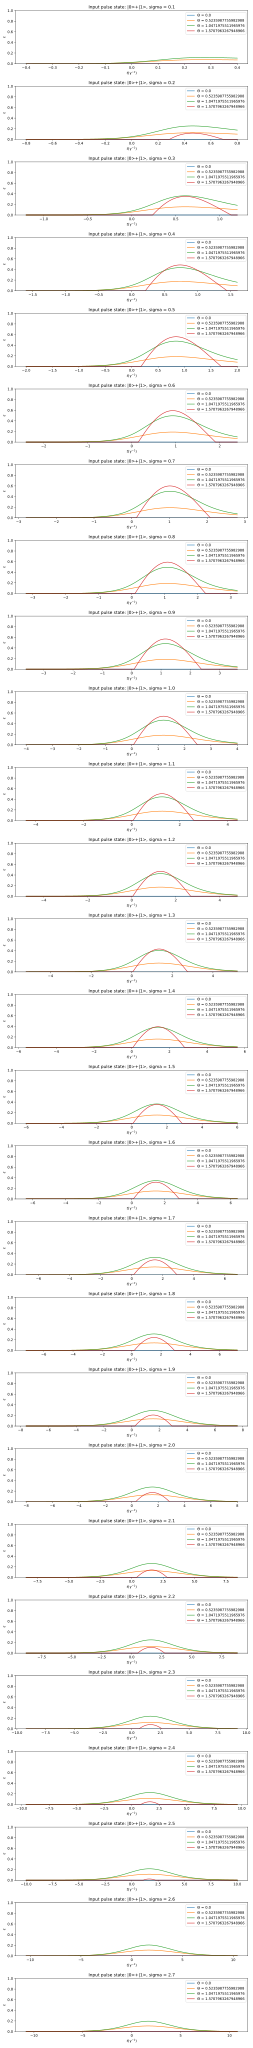

In [4]:
fig, ax = plt.subplots(27, figsize=(10,80))
#fig.set_figheight(10)
#fig.set_figwidth(40)
source_dir = "../../outputs/gaussian/fixed_sigma/super_2/"
angles = np.linspace(0, np.pi / 2, 4)

for axes, sigma in zip(ax, range_decimal(0.1,2.7,0.1,stop_inclusive=True)):
    for theta in angles:
        #pur = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
        #                 "theta_" + str(theta) + "/purity.dat")
        erg = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
                         "theta_" + str(theta) + "/ergotropy.dat")
        #ene = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
        #                 "theta_" + str(theta) + "/energy.dat")
        #axes.plot(pur[:,0], pur[:,1], '-m', label='$\mu$')
        #axes.plot(ene[:,0], ene[:,1], '-b', label='$E$')
        axes.plot(erg[:,0], erg[:,1], label='$\Theta$ = ' + str(theta))

    #ax.set_xlim(0,15)
    axes.set_ylim(0,1)
    axes.set_ylabel('$\epsilon$')
    axes.set_xlabel('$t(\gamma^{-1})$')
    axes.set_title("Input pulse state: |0>+|1>, sigma = " + str(sigma))

    axes.legend()

plt.tight_layout()
plt.show()

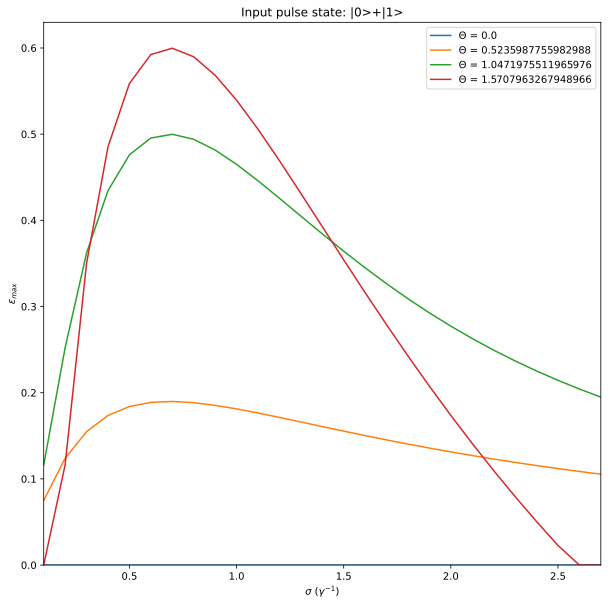

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

source_dir = "../../outputs/gaussian/fixed_sigma/super_2/"
angles = np.linspace(0, np.pi / 2, 4)

for theta in angles:
    max_erg, sig_l = [], []
    for sigma in range_decimal(0.1,2.7,0.1,stop_inclusive=True):
        erg = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
                         "theta_" + str(theta) + "/ergotropy.dat")
        sig_l.append(float(sigma))
        max_erg.append(erg[:,1].max())
    ax.plot(sig_l, max_erg, label='$\Theta$ = ' + str(theta))

ax.set_xlim(sig_l[0],sig_l[-1])
ax.set_ylim(0)
ax.set_title("Input pulse state: |0>+|1>")
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_ylabel('$\epsilon_{max}$')
ax.legend()
plt.show()

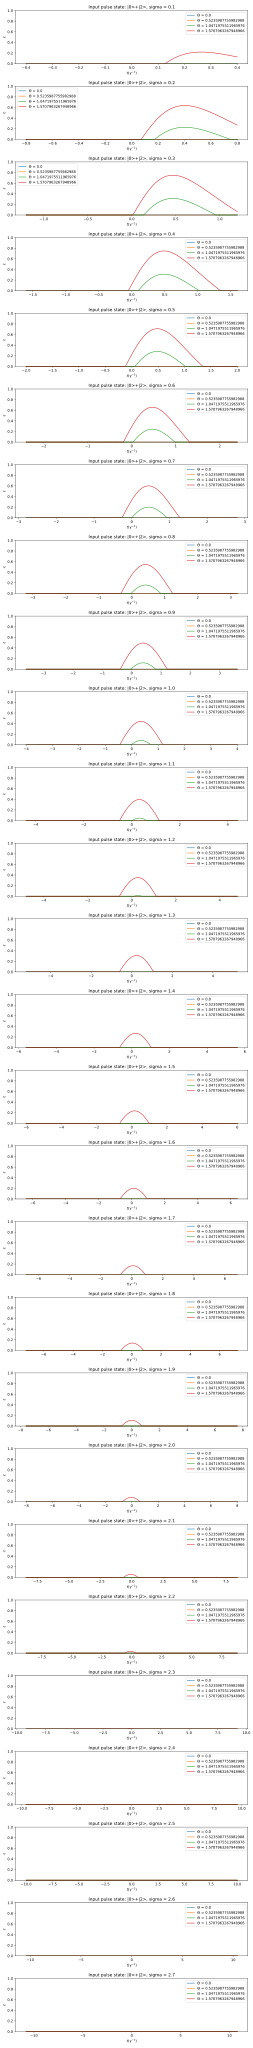

In [9]:
fig, ax = plt.subplots(27, figsize=(10,80))
#fig.set_figheight(10)
#fig.set_figwidth(40)
source_dir = "../../outputs/gaussian/fixed_sigma/super_3/"
angles = np.linspace(0, np.pi / 2, 4)

for axes, sigma in zip(ax, range_decimal(0.1,2.7,0.1,stop_inclusive=True)):
    for theta in angles:
        #pur = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
        #                 "theta_" + str(theta) + "/purity.dat")
        erg = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
                         "theta_" + str(theta) + "/ergotropy.dat")
        #ene = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
        #                 "theta_" + str(theta) + "/energy.dat")
        #axes.plot(pur[:,0], pur[:,1], '-m', label='$\mu$')
        #axes.plot(ene[:,0], ene[:,1], '-b', label='$E$')
        axes.plot(erg[:,0], erg[:,1], label='$\Theta$ = ' + str(theta))

    #ax.set_xlim(0,15)
    axes.set_ylim(0,1)
    axes.set_ylabel('$\epsilon$')
    axes.set_xlabel('$t(\gamma^{-1})$')
    axes.set_title("Input pulse state: |0>+|2>, sigma = " + str(sigma))

    axes.legend()

plt.tight_layout()
plt.show()

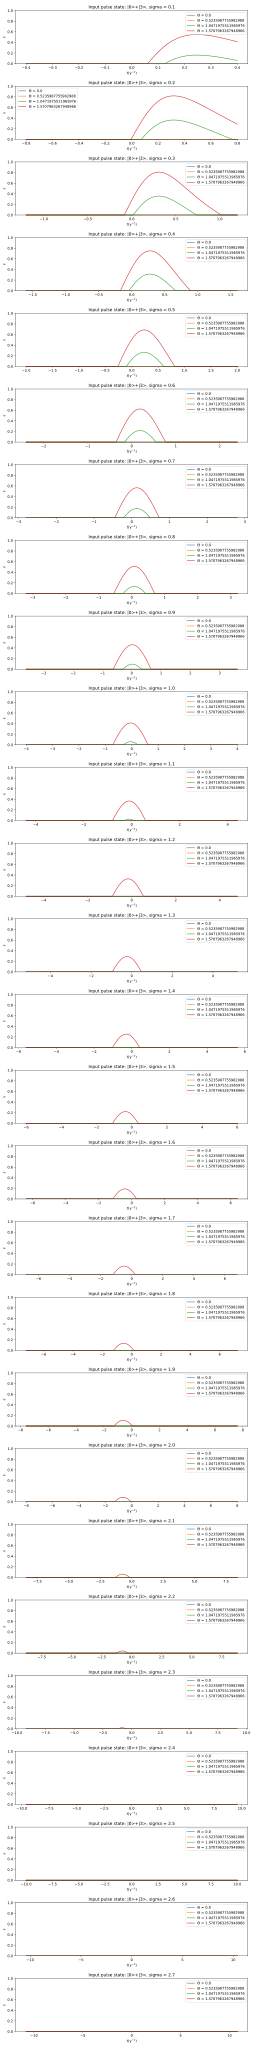

In [10]:
fig, ax = plt.subplots(27, figsize=(10,80))
#fig.set_figheight(10)
#fig.set_figwidth(40)
source_dir = "../../outputs/gaussian/fixed_sigma/super_4/"
angles = np.linspace(0, np.pi / 2, 4)

for axes, sigma in zip(ax, range_decimal(0.1,2.7,0.1,stop_inclusive=True)):
    for theta in angles:
        #pur = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
        #                 "theta_" + str(theta) + "/purity.dat")
        erg = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
                         "theta_" + str(theta) + "/ergotropy.dat")
        #ene = np.loadtxt(source_dir + "sigma_" + str(sigma) + "/precision_0.001/" + 
        #                 "theta_" + str(theta) + "/energy.dat")
        #axes.plot(pur[:,0], pur[:,1], '-m', label='$\mu$')
        #axes.plot(ene[:,0], ene[:,1], '-b', label='$E$')
        axes.plot(erg[:,0], erg[:,1], label='$\Theta$ = ' + str(theta))

    #ax.set_xlim(0,15)
    axes.set_ylim(0,1)
    axes.set_ylabel('$\epsilon$')
    axes.set_xlabel('$t(\gamma^{-1})$')
    axes.set_title("Input pulse state: |0>+|3>, sigma = " + str(sigma))

    axes.legend()

plt.tight_layout()
plt.show()